In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from Config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Search for People Tweeting about Mark Hamill
search_term = "Washington Capitals"

# Create variable for holding the oldest tweet
oldest_tweet = None

# List to hold unique IDs
unique_ids = []

compound_list=[]
positive_list=[]
negative_list=[]
neutral_list=[]

# Counter to keep track of the number of tweets retrieved
counter = 0

# Loop through 5 times (total of 500 tweets)
for x in range(20):

    # Retrieve 100 most recent tweets -- specifying a max_id
    public_tweets = api.search(search_term, 
                               count=100, 
                               result_type="recent", 
                               max_id=oldest_tweet,
                              tweet_mode="extended")

    # Print Tweets
    for tweet in public_tweets["statuses"]:

        results = analyzer.polarity_scores(tweet["full_text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)    
        
        # Append tweet_id to ids list if it doesn't already exist
        # This allows checking for duplicate tweets
        tweet_id = tweet["id"]
        
        if tweet_id not in unique_ids:
            unique_ids.append(tweet_id)
       
        # Reassign the the oldest tweet (i.e. the max_id)
        # Subtract 1 so the previous oldest isn't included
        # in the new search
        
        oldest_tweet = tweet_id - 1
        
        # Increase counter by 1
        counter += 1
print(counter)

2000


In [4]:
# Print the Averages
print(f"Search term: {search_term}")
print(f"Compound: {np.mean(compound_list):.3f}")
print(f"Positive: {np.mean(positive_list):.3f}")
print(f"Neutral: {np.mean(neutral_list):.3f}")
print(f"Negative: {np.mean(negative_list):.3f}")

Search term: Washington Capitals
Compound: 0.493
Positive: 0.193
Neutral: 0.790
Negative: 0.017


In [5]:
ZipList=list(zip(compound_list,positive_list,neutral_list,negative_list))
sentiments= pd.DataFrame(ZipList, columns = ["Compound ",
                                           "Positive",
                                           "Neutral",
                                           "Negative"])
#sentiments.mean().plot(kind="bar")

graph=sentiments.mean()
graph=pd.DataFrame(graph)

graph.columns=["Score"]
y=graph["Score"]


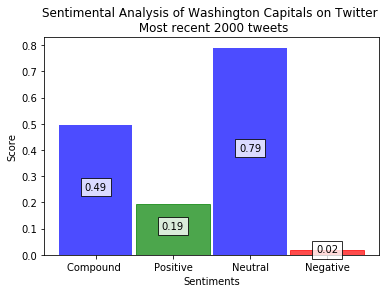

In [6]:
y=graph["Score"]
x_axis=[]
for x in graph.index:
    x_axis.append(x)
    
graph=plt.bar(x_axis, y, color='blue', width=-0.95,align="center", alpha=0.7)
graph[3].set_color('r')
graph[1].set_color('g')

plt.title(f"Sentimental Analysis of {search_term} on Twitter \n Most recent {counter} tweets")
plt.xlabel("Sentiments")
plt.ylabel("Score")
#plt.grid()

labels=[]
for i in y:
    v=round(i,2)
    labels.append(f"{v}")

for z in range(0,len(x_axis)):
    height= np.sign(y[z])*(np.absolute((y[z]/2)))
    plt.text(z,height, labels[z], 
             horizontalalignment='center',
             verticalalignment='baseline',
             bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("SentimentatAnalysis.png")


